In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.1/124.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
#hide
from fastbook import *

# Other Computer Vision Problems

## Multi-Label Classification

### The Data

In [3]:
from fastai.vision.all import *
path = untar_data(URLs.PASCAL_2007)

In [4]:
df = pd.read_csv(path/'train.csv')
df.head()

# Usa a biblioteca pandas para transformar o csv em um data frame. 
# Mostra as primeiras 5 linhas do df. 

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


### Sidebar: Pandas and DataFrames

In [5]:
df.iloc[:,0]

# df é seu DataFrame (tabela de dados).
# .iloc é um método do pandas que permite acessar linhas e colunas por posição numérica (índices).
# : significa todas as linhas.
# 0 significa a primeira coluna (coluna de índice 0)

0       000005.jpg
1       000007.jpg
2       000009.jpg
3       000012.jpg
4       000016.jpg
           ...    
5006    009954.jpg
5007    009955.jpg
5008    009958.jpg
5009    009959.jpg
5010    009961.jpg
Name: fname, Length: 5011, dtype: object

In [6]:
df.iloc[0,:]
# Trailing :s are always optional (in numpy, pytorch, pandas, etc.),
#   so this is equivalent:
df.iloc[0]

fname       000005.jpg
labels           chair
is_valid          True
Name: 0, dtype: object

In [7]:
df['fname']

# Retorna a coluna inteira chamada 'fname' do DataFrame df

0       000005.jpg
1       000007.jpg
2       000009.jpg
3       000012.jpg
4       000016.jpg
           ...    
5006    009954.jpg
5007    009955.jpg
5008    009958.jpg
5009    009959.jpg
5010    009961.jpg
Name: fname, Length: 5011, dtype: object

In [8]:
tmp_df = pd.DataFrame({'a':[1,2], 'b':[3,4]})
tmp_df

# Cria um DataFrame com duas colunas:
# 'a' com os valores [1, 2]
# 'b' com os valores [3, 4]

,a,b
0,1,3
1,2,4


In [9]:
tmp_df['c'] = tmp_df['a']+tmp_df['b']
tmp_df

# tmp_df['a'] + tmp_df['b'] faz a soma elemento a elemento das colunas 'a' e 'b'.
# O resultado é uma nova coluna chamada 'c' adicionada ao DataFrame.

,a,b,c
0,1,3,4
1,2,4,6


### End sidebar

### Constructing a DataBlock

In [10]:
dblock = DataBlock()

# Cria um objeto vazio de DataBlock, que ainda não sabe como pegar os dados, transformá-los ou dividi-los.
# O DataBlock é como um "plano de montagem" de um conjunto de dados (dataset) para deep learning

In [11]:
dsets = dblock.datasets(df)

# Aplica o DataBlock que você criou ao DataFrame df.
# Isso gera dois conjuntos de dados (datasets):
# dsets.train → dados de treino
# dsets.valid → dados de validação
# Esses datasets ainda não estão em mini-batches — são apenas listas com os pares (x, y) processados.

# Mas atenção:
# Se o seu DataBlock ainda está vazio (como em DataBlock() sem argumentos), essa linha provavelmente vai dar erro ou gerar datasets sem sentido — porque o fastai não sabe:
# o que é x (entrada),
# o que é y (rótulo),
# como dividir os dados.

In [12]:
len(dsets.train),len(dsets.valid)

# Mostra o número de exemplos (pares de entrada e saída) em:
# dsets.train → conjunto de treino
# dsets.valid → conjunto de validação
# Como nada foi configurado, ele usa o splitter padrão

(4009, 1002)

In [13]:
x,y = dsets.train[0]
x,y

# Acessa o primeiro par (entrada, saída) do dataset de treino.

# Atribui:
# x → a entrada (imagem)
# y → a saída (rótulo(s))
# Em seguida, imprime os dois.
# Ele simplesmente imprimiu duas vezes uma mesma linha do df, pq não definimos o que é label e o que é input. Vamos fazer isso em seguida.

(fname       008663.jpg
 labels      car person
 is_valid         False
 Name: 4346, dtype: object,
 fname       008663.jpg
 labels      car person
 is_valid         False
 Name: 4346, dtype: object)

In [14]:
x['fname']

'008663.jpg'

In [15]:
dblock = DataBlock(get_x = lambda r: r['fname'], get_y = lambda r: r['labels'])
dsets = dblock.datasets(df)
dsets.train[0]

# Você está criando um DataBlock.
# Está dizendo que:
# get_x → pega a coluna 'fname' (nome do arquivo da imagem)
# get_y → pega a coluna 'labels' (string com os rótulos)

('005620.jpg', 'aeroplane')

In [16]:
def get_x(r): return r['fname']
def get_y(r): return r['labels']
dblock = DataBlock(get_x = get_x, get_y = get_y)
dsets = dblock.datasets(df)
dsets.train[0]

# Mesma coisa que o codigo anterior, mas escrito de forma mais comprida, definindo a função completamente

('002549.jpg', 'tvmonitor')

In [17]:
def get_x(r): return path/'train'/r['fname']
def get_y(r): return r['labels'].split(' ')
dblock = DataBlock(get_x = get_x, get_y = get_y)
dsets = dblock.datasets(df)
dsets.train[0]

# No código anterior, a definição de X não mostrava o caminho da imagem e a de Y mostrava múltiplos rótulos como um único. Vamos resolver o problema da seguinte maneira:

# get_x(r):
    # Recebe uma linha r do DataFrame.
    # Retorna o caminho completo da imagem.
    # Exemplo: se r['fname'] for '000123.jpg', retorna path/'train'/'000123.jpg'.

# get_y(r):
    # Divide a string de rótulos em uma lista.
    # Exemplo: 'car person dog' → ['car', 'person', 'dog']
    # Isso é essencial para o fastai entender que essa é uma tarefa de multirrótulo.

(Path('/root/.fastai/data/pascal_2007/train/002844.jpg'), ['train'])

In [18]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   get_x = get_x, get_y = get_y)
dsets = dblock.datasets(df)
dsets.train[0]

# Para abrir a imagem e converte-la em tensores precisamos usar transformadores. Isso é feito pelos blocks

# blocks=(ImageBlock, MultiCategoryBlock):
# Diz ao fastai que:
# A entrada (x) é uma imagem
# A saída (y) é uma lista de rótulos (ex: ['car', 'person'])
# Essa é a escolha certa pra problemas onde uma imagem pode ter vários rótulos ao mesmo tempo (diferente de classificação simples, onde é só um rótulo por imagem).

# dsets = dblock.datasets(df)
# Cria um datablock através do dataset df

# Mostra o primeiro par de imagem, rótulos
# x é uma imagem carregada de verdade, não só o caminho
# y é uma lista de rótulos (lista de 0s, com 1s onde a categoria está presente - one hot encoding)

(PILImage mode=RGB size=500x375,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [19]:
idxs = torch.where(dsets.train[0][1]==1.)[0]
dsets.train.vocab[idxs]

# dsets.train[0][1]
    # Isso pega o segundo elemento (índice 1) da primeira amostra de treino → ou seja, os rótulos.
    # Só que agora, depois que você usou MultiCategoryBlock, esses rótulos já estão convertidos em tensores binários (vetor com 0. e 1.).

# torch.where(... == 1.)[0]
    # Retorna os índices no vetor onde o valor é 1..
    # Ou seja: as posições dos rótulos que estão ativos para essa imagem.

# dsets.train.vocab[idxs]
    # vocab é uma lista de todos os rótulos possíveis, na mesma ordem dos vetores binários.
    # Ao passar idxs, você obtém os nomes dos rótulos ativos para essa imagem.

(#1) ['dog']

In [20]:
def splitter(df):
    train = df.index[~df['is_valid']].tolist()
    valid = df.index[df['is_valid']].tolist()
    return train,valid

dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=splitter,
                   get_x=get_x, 
                   get_y=get_y)

dsets = dblock.datasets(df)
dsets.train[0]

# Até agora, o datablock estava usando o random split para dividir o dataset em validação e treinamento. Agora vamos usar a coluna is_valid do nosso dataframe.
    # df['is_valid']: Isso retorna uma Series booleana com True e False.
    # ~df['is_valid']: O operador ~ (til) inverte os valores booleanos: True → False, False → True
    # df.index[...]: Acessa os índices das linhas que satisfazem a condição (ex: treino ou validação).
    # .tolist(): Converte os índices (que são objetos do tipo Index) em listas padrão Python, como [0, 1, 5, 8]

(PILImage mode=RGB size=500x333,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [21]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=splitter,
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms = RandomResizedCrop(128, min_scale=0.35))
dls = dblock.dataloaders(df)

# item_tfms significa: transformações aplicadas a cada item individualmente, antes de montar os mini-batches.

# RandomResizedCrop(128, min_scale=0.35) Essa é uma das transformações mais comuns em visão computacional. Ela:
    # Corta um pedaço aleatório da imagem original.
    # Redimensiona esse pedaço para 128 x 128 (ou outro tamanho que você definir).
    # Parâmetros: 128: tamanho final da imagem (quadrado: 128×128). min_scale=0.35: controla o quanto da imagem original será usada no corte. 0.35 significa que o crop pode ser de no mínimo 35% da imagem original.

# Isso é uma forma de data augmentation — ou seja, gerar pequenas variações das imagens para melhorar o treinamento, o que ajuda o modelo a generalizar melhor.

# "Para cada imagem, recorte uma parte aleatória de pelo menos 35% do tamanho original, redimensione para 128×128 e use isso como entrada."

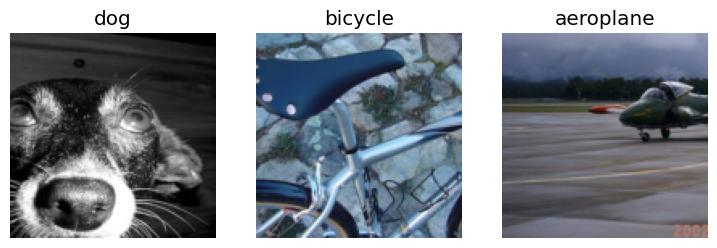

In [22]:
dls.show_batch(nrows=1, ncols=3)

### Binary Cross-Entropy

In [23]:
learn = vision_learner(dls, resnet18)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 134MB/s] 


In [24]:
x,y = to_cpu(dls.train.one_batch())
activs = learn.model(x)
activs.shape

# Pega um mini-batch da base de treino.
# Retorna:
# x = batch de imagens → tensor com shape como (bs, 3, 128, 128)
# y = batch de rótulos → tensor com shape (bs, n_classes)
# to_cpu(...) move os dados pra CPU, pra facilitar a inspeção (em vez de manter na GPU)

# activs = learn.model(x)
# Passa as imagens x pelo modelo da rede neural (resnet18 + camadas finais).
# Retorna as ativação brutas (logits), ou seja: os valores antes da função de ativação final (sigmoid, no caso de multirrótulo).

# activs.shape
# Shape do tensor das ativações: 
# 64 imagens no batch
# 20 rótulos possíveis (como em Pascal VOC)

torch.Size([64, 20])

In [25]:
activs[0]

# Acessa a primeira linha do tensor activs, ou seja, as ativação brutas (logits) do modelo para a primeira imagem do batch.

TensorImage([ 0.5674, -1.2013,  4.5409, -1.5284, -0.6600,  0.0999, -2.4757, -0.8773, -0.2934, -1.4746, -0.1738,  2.1763, -3.4473, -1.1407,  0.1783, -1.6922, -2.3396,  0.7602, -1.4213, -0.4334],
            grad_fn=<AliasBackward0>)

In [26]:
def binary_cross_entropy(inputs, targets):
    inputs = inputs.sigmoid()
    return -torch.where(targets==1, inputs, 1-inputs).log().mean()

# Implementando manual e didaticamente a função de Binary Cross Entropy (BCE), que é a função de perda (loss function) mais usada em classificação multirrótulo.

# O que essa função faz:

# 1 inputs = inputs.sigmoid()
    # Transforma os logits brutos (saída do modelo) em probabilidades entre 0 e 1. Isso porque a Binary Cross Entropy precisa trabalhar com probabilidades.

# 2 torch.where(targets==1, inputs, 1-inputs)
    # Se o target (rótulo verdadeiro) for 1, usa inputs (a probabilidade predita de ser 1).
    # Se for 0, usa 1 - inputs (a probabilidade predita de ser 0).
    # Ou seja: pega a probabilidade correta, de acordo com o que o rótulo verdadeiro manda.

# .log().mean()
    # Aplica o logaritmo da probabilidade correta, que é o que define a perda de entropia cruzada.
    # -log(p) penaliza mais fortemente quando o modelo está confiante e errado.
    # mean() tira a média entre todos os rótulos e amostras.

# A função mede o quanto as previsões (inputs) se afastam dos rótulos corretos (targets).

In [27]:
loss_func = nn.BCEWithLogitsLoss()
loss = loss_func(activs, y)
loss

# nn.BCEWithLogitsLoss()
# Cria a função de perda Binary Cross Entropy with Logits.
# Essa é a escolha correta e eficiente para multirrótulo.

# loss_func(activs, y): Compara os logits do modelo (activs) com os rótulos verdadeiros (y) — que devem estar como vetores binários, com 0 e 1.

# loss: O resultado é um único valor escalar (ex: tensor(0.4321)), que representa o erro médio do modelo nesse batch.

TypeError: no implementation found for 'torch.nn.functional.binary_cross_entropy_with_logits' on types that implement __torch_function__: [<class 'fastai.torch_core.TensorImage'>, <class 'fastai.torch_core.TensorMultiCategory'>]

In [28]:
def say_hello(name, say_what="Hello"): return f"{say_what} {name}."
say_hello('Jeremy'),say_hello('Jeremy', 'Ahoy!')

('Hello Jeremy.', 'Ahoy! Jeremy.')

In [29]:
f = partial(say_hello, say_what="Bonjour")
f("Jeremy"),f("Sylvain")

('Bonjour Jeremy.', 'Bonjour Sylvain.')

In [30]:
learn = vision_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learn.fine_tune(3, base_lr=3e-3, freeze_epochs=4)

# Cria um Learner com:
    # dls: seus DataLoaders com imagens e rótulos multirrótulo
    # resnet50: backbone do modelo (mais profundo que resnet18)
    # metrics: mede o desempenho com accuracy_multi

# accuracy_multi É usada para classificação multirrótulo. Ele calcula a proporção de rótulos corretamente previstos por imagem e depois tira a média entre todas as imagens do batch.
    # A partial(..., thresh=0.2) define que uma classe será considerada predita se sua probabilidade for maior que 0.2 após o sigmoid.
    # sigmoid(output) > 0.2 → 1 (classe presente)
    # O threshold (thresh) é importante pois define a sensibilidade da detecção de cada rótulo.

# Threshold	Interpretação	    Impacto
# < 0.5	    Mais permissivo	    Maior sensibilidade, menor precisão
# > 0.5	   Mais restritivo	    Maior precisão, menor sensibilidade
# A escolha depende do seu objetivo: você quer errar menos ou não perder nada?



# learn.fine_tune(3, base_lr=3e-3, freeze_epochs=4)
# Treina o modelo com duas fases:
    # Fase congelada: treina só as camadas finais (head) por freeze_epochs=4 épocas.
    # Fase descongelada: treina o modelo todo (backbone + head) por mais 3 épocas.
    # O argumento base_lr=3e-3 define a learning rate inicial.

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 135MB/s] 


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.956206,0.704960,0.226295,00:15
1,0.826413,0.545628,0.286952,00:14
2,0.601233,0.203268,0.804681,00:15
3,0.353771,0.116428,0.946275,00:14


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.127451,0.101318,0.953227,00:17
1,0.111993,0.097381,0.956594,00:17
2,0.098401,0.093789,0.956076,00:17


In [31]:
learn.metrics = partial(accuracy_multi, thresh=0.1)
learn.validate()

# Aqui você está trocando o limiar de decisão (threshold) da métrica accuracy_multi para um valor mais baixo (0.1), e avaliando o modelo com ele.
# Retorna uma lista: [loss, metric_value]

(#2) [0.09378856420516968,0.9362749457359314]

In [32]:
learn.metrics = partial(accuracy_multi, thresh=0.99)
learn.validate()

(#2) [0.09378856420516968,0.9430876970291138]

In [33]:
preds,targs = learn.get_preds()
# Extraindo as previsões do modelo e os rótulos reais do conjunto de validação — um passo super importante para análise mais profunda.

# preds → um tensor com as saídas do modelo (logits) para todos os exemplos de validação.
# Ex: torch.Size([1003, 20]) → 1003 imagens, 20 rótulos

# targs → um tensor com os rótulos reais (targets) dessas imagens.
# Mesmo shape: torch.Size([1003, 20])
# Contém 0. ou 1. indicando ausência/presença de cada classe

In [34]:
accuracy_multi(preds, targs, thresh=0.9, sigmoid=False)

# preds: logits brutos (ainda não passaram por sigmoid)
# targs: rótulos reais (0 ou 1)
# thresh=0.9: usa 90% como limite para considerar que o modelo "acertou" uma classe
# sigmoid=False: diz à função que você vai aplicar sigmoid por fora, se quiser. Mas nesse caso, ela aplica o sigmoid internamente por padrão — e você está dizendo: não precisa aplicar de novo.

TensorBase(0.9594)

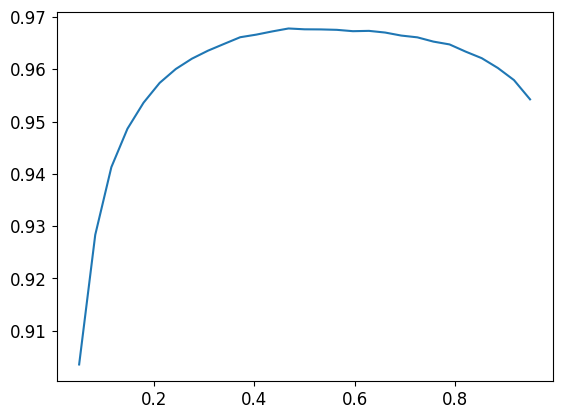

In [35]:
xs = torch.linspace(0.05,0.95,29)
accs = [accuracy_multi(preds, targs, thresh=i, sigmoid=False) for i in xs]
plt.plot(xs,accs);

# xs = torch.linspace(0.05, 0.95, 29)
# Gera 29 valores igualmente espaçados entre 0.05 e 0.95.
# Cada valor será testado como threshold para converter probabilidades em rótulos binários.

# accs = [accuracy_multi(preds, targs, thresh=i, sigmoid=False) for i in xs]
# Para cada threshold i, calcula a acurácia multirrótulo.

# plt.plot(xs, accs);
# Plota o gráfico de threshold vs. acurácia.
# Ideal pra visualizar:
# Quando o threshold está muito baixo, o modelo "acerta" tudo (mas com muito falso positivo).
# Quando está muito alto, ele fica conservador demais e perde rótulos (falso negativo).

## Regression

### Assemble the Data

In [36]:
path = untar_data(URLs.BIWI_HEAD_POSE)

In [37]:
#hide
Path.BASE_PATH = path

In [38]:
path.ls().sorted()

(#50) [Path('01'),Path('01.obj'),Path('02'),Path('02.obj'),Path('03'),Path('03.obj'),Path('04'),Path('04.obj'),Path('05'),Path('05.obj'),Path('06'),Path('06.obj'),Path('07'),Path('07.obj'),Path('08'),Path('08.obj'),Path('09'),Path('09.obj'),Path('10'),Path('10.obj')...]

In [39]:
(path/'01').ls().sorted()

(#1000) [Path('01/depth.cal'),Path('01/frame_00003_pose.txt'),Path('01/frame_00003_rgb.jpg'),Path('01/frame_00004_pose.txt'),Path('01/frame_00004_rgb.jpg'),Path('01/frame_00005_pose.txt'),Path('01/frame_00005_rgb.jpg'),Path('01/frame_00006_pose.txt'),Path('01/frame_00006_rgb.jpg'),Path('01/frame_00007_pose.txt'),Path('01/frame_00007_rgb.jpg'),Path('01/frame_00008_pose.txt'),Path('01/frame_00008_rgb.jpg'),Path('01/frame_00009_pose.txt'),Path('01/frame_00009_rgb.jpg'),Path('01/frame_00010_pose.txt'),Path('01/frame_00010_rgb.jpg'),Path('01/frame_00011_pose.txt'),Path('01/frame_00011_rgb.jpg'),Path('01/frame_00012_pose.txt')...]

In [40]:
img_files = get_image_files(path)
def img2pose(x): return Path(f'{str(x)[:-7]}pose.txt')
img2pose(img_files[0])

# img_files = get_image_files(path): Isso busca todas as imagens (.png) recursivamente dentro do diretório path.

# def img2pose(x): return Path(f'{str(x)[:-7]}pose.txt')
# Você define uma função que:
# Recebe o caminho da imagem (x)
# Converte para string, remove os últimos 7 caracteres
# Ex: 'frame_00013_rgb.png' → 'frame_00013_'
# Adiciona 'pose.txt' no final → 'frame_00013_pose.txt'
# Converte de volta para Path

# img2pose(img_files[0])
# ✅ Aplica a função img2pose ao primeiro caminho de imagem 

# Por que isso importa?
# Porque mais tarde, você vai usar essa função como:
# get_y = img2pose
# Ou seja: dado o caminho da imagem, fastai saberá qual arquivo abrir para pegar os rótulos numéricos.

Path('22/frame_00163_pose.txt')

In [41]:
im = PILImage.create(img_files[0])
im.shape

# PILImage.create(...): Essa é uma função do fastai que usa o PIL (Python Imaging Library) para abrir a imagem e automaticamente converte para um tensor com formato compatível com modelos de visão.

# im.shape: Retorna a forma da imagem como tensor.

(480, 640)

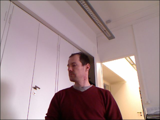

In [42]:
im.to_thumb(160)

In [43]:
cal = np.genfromtxt(path/'01'/'rgb.cal', skip_footer=6)
def get_ctr(f):
    ctr = np.genfromtxt(img2pose(f), skip_header=3)
    c1 = ctr[0] * cal[0][0]/ctr[2] + cal[0][2]
    c2 = ctr[1] * cal[1][1]/ctr[2] + cal[1][2]
    return tensor([c1,c2])

# cal = np.genfromtxt(path/'01'/'rgb.cal', skip_footer=6)
# Lê o arquivo de calibração rgb.cal da câmera RGB, que contém:
# Informações como foco, centro da imagem e escala de projeção.
# skip_footer=6 ignora as últimas 6 linhas (normalmente metadados ou comentários).
# cal vai ser uma matriz 3x3 com parâmetros intrínsecos da câmera.

# def get_ctr(f):
#   ctr = np.genfromtxt(img2pose(f), skip_header=3)
# Lê o arquivo .pose.txt da imagem f
# Ignora as 3 primeiras linhas (que são cabeçalhos), e pega o vetor de posição 3D da cabeça: [x, y, z].

# c1 = ctr[0] * cal[0][0]/ctr[2] + cal[0][2]
# c2 = ctr[1] * cal[1][1]/ctr[2] + cal[1][2]
# O que está acontecendo aqui:
# ctr é a posição 3D da cabeça: [x, y, z]
#  Isso transforma:
# A posição 3D da cabeça → posição 2D na imagem (em pixels)

In [44]:
get_ctr(img_files[0])

tensor([311.6877, 268.2660])

In [45]:
biwi = DataBlock(
    blocks=(ImageBlock, PointBlock),
    get_items=get_image_files,
    get_y=get_ctr,
    splitter=FuncSplitter(lambda o: o.parent.name=='13'),
    batch_tfms=aug_transforms(size=(240,320)), 
)

# blocks=(ImageBlock, PointBlock)
# Você está dizendo:
# Entrada: imagem
# Saída: ponto 2D → ideal para coordenadas (ex: posição da cabeça na imagem). O PointBlock cuida de normalizar e desnormalizar os pontos automaticamente com base no tamanho da imagem.

# get_items=get_image_files: Encontra todas as imagens dentro da pasta (recursivamente).

# get_y=get_ctr: Para cada imagem, extrai as coordenadas 2D da cabeça, usando a função que você criou:

# splitter=FuncSplitter(lambda o: o.parent.name=='13'): Usa as imagens da pasta 13 como validação, e o resto como treino. o é o caminho da imagem → o.parent.name retorna o número da pessoa (ex: '13').

#  batch_tfms=aug_transforms(size=(240,320)). Aplica data augmentation leve + redimensionamento das imagens para 240×320.

# O PointBlock garante que os pontos 2D também sejam transformados junto com a imagem (por exemplo, se houver flip, crop, etc.).

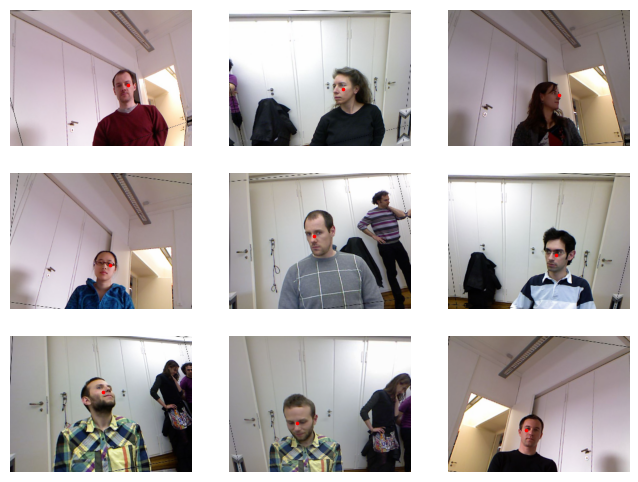

In [46]:
dls = biwi.dataloaders(path)
dls.show_batch(max_n=9, figsize=(8,6))

In [47]:
xb,yb = dls.one_batch()
xb.shape,yb.shape

(torch.Size([64, 3, 240, 320]), torch.Size([64, 1, 2]))

In [48]:
yb[0]

TensorPoint([[0.0196, 0.0878]], device='cuda:0')

### Training a Model

In [49]:
learn = vision_learner(dls, resnet18, y_range=(-1,1))

# Criando o learner
# y_range=(-1,1)
# Isso limita a saída do modelo a estar dentro do intervalo [-1, 1].
# Útil porque o PointBlock normaliza os pontos 2D da imagem para esse intervalo.
# Garante que o modelo não tente prever pontos fora da imagem.

In [50]:
def sigmoid_range(x, lo, hi): return torch.sigmoid(x) * (hi-lo) + lo

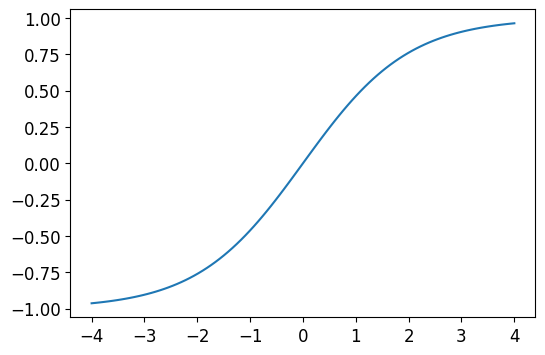

In [51]:
plot_function(partial(sigmoid_range,lo=-1,hi=1), min=-4, max=4)

In [52]:
dls.loss_func

# Mostra qual é a função de perda (loss function) que está sendo usada por padrão nos DataLoaders (dls).

FlattenedLoss of MSELoss()

SuggestedLRs(valley=0.001737800776027143)

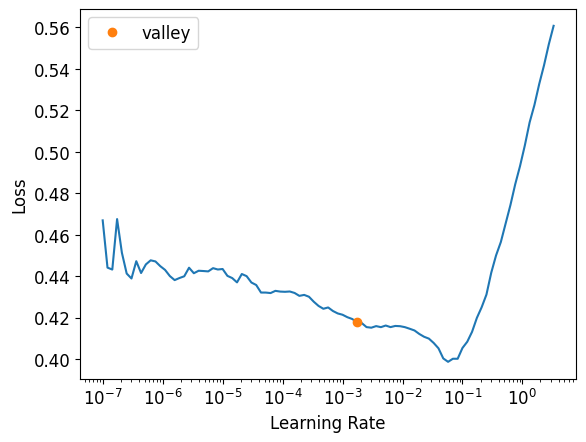

In [53]:
learn.lr_find()

# Encontrando o LR adequado

In [54]:
lr = 1e-2
learn.fine_tune(3, lr)

# lr = 1e-2: Define a learning rate base: 0.01

# learn.fine_tune(3, lr)
# Treina o modelo com o método fine-tune, que faz o seguinte:
# Fase 1: 1 época congelado
# Fase 2: 2 épocas descongelado (total = 3 épocas)

epoch,train_loss,valid_loss,time
0,0.051531,0.028793,01:21


epoch,train_loss,valid_loss,time


KeyboardInterrupt: 

In [ ]:
math.sqrt(0.0001)

In [ ]:
learn.show_results(ds_idx=1, nrows=3, figsize=(6,8))

# ds_idx=1	Usa o conjunto de validação (índice 1) — o de treino seria 0.
# nrows=3	Mostra 3 linhas de resultados
# figsize=(6,8)	Define o tamanho da figura (em polegadas)

## Conclusion

## Questionnaire

1. How could multi-label classification improve the usability of the bear classifier?
1. How do we encode the dependent variable in a multi-label classification problem?
1. How do you access the rows and columns of a DataFrame as if it was a matrix?
1. How do you get a column by name from a DataFrame?
1. What is the difference between a `Dataset` and `DataLoader`?
1. What does a `Datasets` object normally contain?
1. What does a `DataLoaders` object normally contain?
1. What does `lambda` do in Python?
1. What are the methods to customize how the independent and dependent variables are created with the data block API?
1. Why is softmax not an appropriate output activation function when using a one hot encoded target?
1. Why is `nll_loss` not an appropriate loss function when using a one-hot-encoded target?
1. What is the difference between `nn.BCELoss` and `nn.BCEWithLogitsLoss`?
1. Why can't we use regular accuracy in a multi-label problem?
1. When is it okay to tune a hyperparameter on the validation set?
1. How is `y_range` implemented in fastai? (See if you can implement it yourself and test it without peeking!)
1. What is a regression problem? What loss function should you use for such a problem?
1. What do you need to do to make sure the fastai library applies the same data augmentation to your input images and your target point coordinates?

### Further Research

1. Read a tutorial about Pandas DataFrames and experiment with a few methods that look interesting to you. See the book's website for recommended tutorials.
1. Retrain the bear classifier using multi-label classification. See if you can make it work effectively with images that don't contain any bears, including showing that information in the web application. Try an image with two different kinds of bears. Check whether the accuracy on the single-label dataset is impacted using multi-label classification.